In [ ]:
from glob import glob
from keras import optimizers
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, models
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
path = glob("character/*/")
data = []
label = [] 
total = 0
x = 32
y = 18

def append_data(directory, total):
  files = os.listdir(directory)
  print(files)
  for image in files:
    if image.endswith(".jpg"):
      image = cv2.imread(directory + image)
      image = cv2.resize(image, (x, y))
      image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image_gs = image_gs.flatten()
      data.append(image_gs)
      label.append(total)

for i in path:
    append_data(i, total)
    total += 1

['ohhara_020.jpg', 'ohhara_022.jpg', 'ohhara_024.jpg', 'ohhara_025.jpg', 'ohhara_026.jpg', 'ohhara_028.jpg', 'ohhara_029.jpg', 'ohhara_030.jpg', 'ohhara_031.jpg', 'ohhara_032.jpg', 'ohhara_033.jpg', 'ohhara_035.jpg', 'ohhara_036.jpg', 'ohhara_037.jpg', 'ohhara_038.jpg', 'ohhara_039.jpg', 'ohhara_040.jpg', 'ohhara_041.jpg', 'ohhara_042.jpg', 'ohhara_043.jpg', 'ohhara_044.jpg', 'ohhara_046.jpg', 'ohhara_049.jpg', 'ohhara_050.jpg', 'ohhara_051.jpg', 'ohhara_052.jpg', 'ohhara_059.jpg', 'ohhara_017.jpg', 'ohhara_015.jpg', 'ohhara_014.jpg', 'ohhara_019.jpg', 'ohhara_016.jpg', 'ohhara_018.jpg', 'ohhara_047.jpg', 'ohhara_027.jpg', 'ohhara_021.jpg', 'ohhara_048.jpg', 'ohhara_057.jpg', 'ohhara_053.jpg', 'ohhara_055.jpg', 'ohhara_058.jpg', 'ohhara_054.jpg', 'ohhara_001.jpg', 'ohhara_002.jpg', 'ohhara_003.jpg', 'ohhara_005.jpg', 'ohhara_008.jpg', 'ohhara_012.jpg', 'ohhara_023.jpg', 'ohhara_034.jpg', 'ohhara_064.jpg', 'ohhara_066.jpg', 'ohhara_067.jpg', 'ohhara_068.jpg', 'ohhara_069.jpg', 'ohhara_0

In [ ]:
data = np.array(data, dtype=np.float64)
label = np.array(label, dtype=np.float64)

train_data, test_data, train_label, test_label = train_test_split(data, label, random_state=1, stratify=label, test_size=0.2)

train_data = train_data.reshape((len(train_data)), x, y, 1)
test_data = test_data.reshape((len(test_data)), x, y, 1)

train_data /= 255
test_data /= 255

train_label = to_categorical(train_label, num_classes=7)
test_label = to_categorical(test_label, num_classes=7)
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(904, 32, 18, 1)
(904, 7)
(226, 32, 18, 1)
(226, 7)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="sigmoid", padding="same", input_shape=(x, y, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))
model.add(layers.Conv2D(32, (3, 3), activation="sigmoid", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="sigmoid"))
model.add(layers.Dense(7, activation="softmax"))

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
result = model.fit(train_data, train_label, batch_size=16, epochs=128, validation_data=(test_data, test_label))

Epoch 1/128
57/57 [==============================] - 6s 84ms/step - loss: 2.2057 - accuracy: 0.2443 - val_loss: 1.9774 - val_accuracy: 0.1770
Epoch 2/128
57/57 [==============================] - 4s 70ms/step - loss: 1.5946 - accuracy: 0.4667 - val_loss: 2.0348 - val_accuracy: 0.1770
Epoch 3/128
57/57 [==============================] - 4s 67ms/step - loss: 1.3586 - accuracy: 0.5577 - val_loss: 2.0122 - val_accuracy: 0.2434
Epoch 4/128
57/57 [==============================] - 4s 62ms/step - loss: 1.1794 - accuracy: 0.6140 - val_loss: 2.0881 - val_accuracy: 0.2345
Epoch 5/128
57/57 [==============================] - 4s 67ms/step - loss: 1.0493 - accuracy: 0.6721 - val_loss: 2.9597 - val_accuracy: 0.1239
Epoch 6/128
57/57 [==============================] - 3s 60ms/step - loss: 0.9823 - accuracy: 0.6763 - val_loss: 3.4438 - val_accuracy: 0.0796
Epoch 7/128
57/57 [==============================] - 3s 61ms/step - loss: 0.9197 - accuracy: 0.6974 - val_loss: 3.2594 - val_accuracy: 0.1283
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 18, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 18, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 17, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 17, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 17, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15360)             0

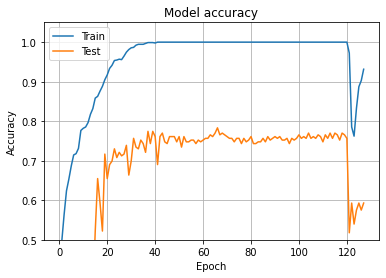

In [ ]:
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.ylim(0.5, 1.05)
plt.grid()
plt.show()

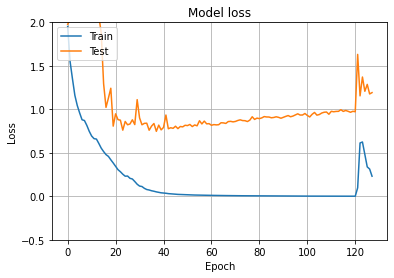

In [ ]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.ylim(-0.5, 2)
plt.grid()
plt.show()

In [ ]:
model.save("identification.h5")